<a href="https://colab.research.google.com/github/spring-board-b2-hate-speech/Group-8/blob/s_work/DL%20model/LSTM_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer

# train_df = pd.read_csv('Train_data.csv')
# test_df = pd.read_csv('Test_data.csv')

# X_train = train_df['clean_text']
# y_train = train_df['IsHatespeech']
# X_test = test_df['clean_text']
# y_test = test_df['IsHatespeech']

# tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
# X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# X_train_tfidf = np.expand_dims(X_train_tfidf, axis=1)
# X_test_tfidf = np.expand_dims(X_test_tfidf, axis=1)

In [15]:


import pandas as pd
import numpy as np
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf

# Load data
train_df = pd.read_csv('Train_data.csv')
test_df = pd.read_csv('Test_data.csv')

X_train = train_df['clean_text'].tolist()
y_train = train_df['IsHatespeech'].tolist()
X_test = test_df['clean_text'].tolist()
y_test = test_df['IsHatespeech'].tolist()

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to get DistilBERT embeddings
def get_distilbert_embeddings(texts, tokenizer, model, max_length=64):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=max_length)
    outputs = model(inputs)
    embeddings = outputs.last_hidden_state
    return embeddings

# Get DistilBERT embeddings for training and testing data
X_train_embeddings = get_distilbert_embeddings(X_train, tokenizer, model).numpy()
X_test_embeddings = get_distilbert_embeddings(X_test, tokenizer, model).numpy()


# Check the shape of the embeddings
print(f'Training data shape: {X_train_embeddings.shape}')
print(f'Test data shape: {X_test_embeddings.shape}')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Training data shape: (7445, 64, 768)
Test data shape: (1862, 64, 768)


In [16]:
# Check the shape of the embeddings
# print(f'Training data shape: {X_train_embeddings.shape}')
# print(f'Test data shape: {X_test_embeddings.shape}')
type(y_train)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Epoch 1/20
59/59 - 71s - loss: 3.0757 - accuracy: 0.7255 - val_loss: 2.4192 - val_accuracy: 0.7465 - lr: 5.0000e-04 - 71s/epoch - 1s/step
Epoch 2/20
59/59 - 62s - loss: 1.9854 - accuracy: 0.7613 - val_loss: 1.6529 - val_accuracy: 0.7368 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 3/20
59/59 - 62s - loss: 1.3691 - accuracy: 0.7743 - val_loss: 1.2380 - val_accuracy: 0.7427 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 4/20
59/59 - 62s - loss: 1.0112 - accuracy: 0.7883 - val_loss: 0.9404 - val_accuracy: 0.7599 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 5/20
59/59 - 62s - loss: 0.8067 - accuracy: 0.7941 - val_loss: 0.7924 - val_accuracy: 0.7605 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 6/20
59/59 - 62s - loss: 0.6813 - accuracy: 0.8081 - val_loss: 0.7145 - val_accuracy: 0.7583 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 7/20
59/59 - 62s - loss: 0.5951 - accuracy: 0.8175 - val_loss: 0.7011 - val_accuracy: 0.7589 - lr: 5.0000e-04 - 62s/epoch - 1s/step
Epoch 8/20
59/59 - 62s - loss: 0.5

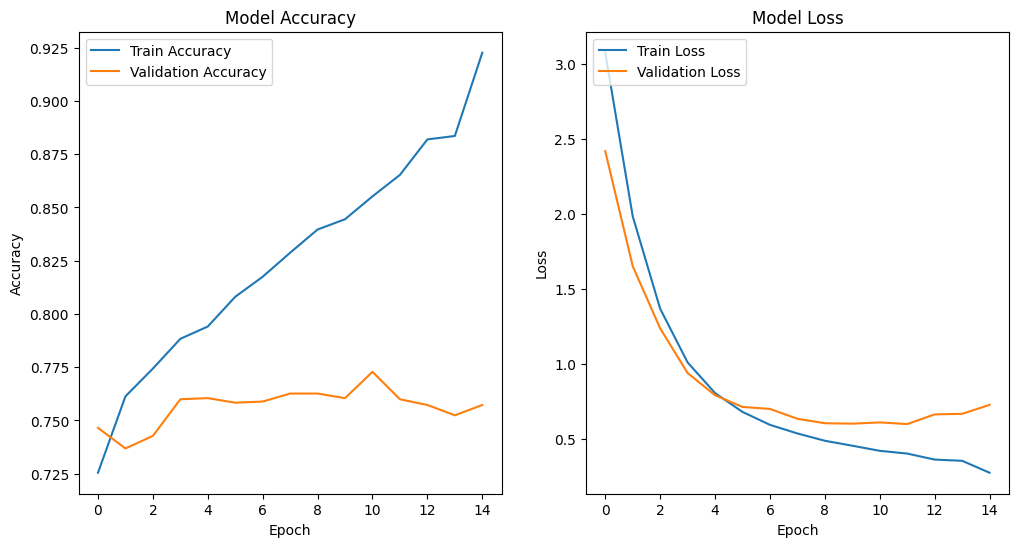

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(512, input_shape=(X_train_embeddings.shape[1], X_train_embeddings.shape[2]), dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

history = model.fit(X_train_embeddings, y_train, epochs=20, batch_size=128,
                    validation_data=(X_test_embeddings, y_test), verbose=2,
                    callbacks=[early_stopping, reduce_lr])

y_pred_prob = model.predict(X_test_embeddings)
y_pred = (y_pred_prob > 0.5).astype("int32")
y_pred = y_pred.flatten()

print("Deep Learning Model Performance with TF-IDF:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()


(119168,)